# Wise MXN→USD Transfer Funnel Analysis

**Period:** February 2024  
**Focus:** User funnel progression, frequent users, and New vs Existing customer patterns

---

## 1. Exploratory Data Analysis

In [1]:
# Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load data
df = pd.read_csv('src/wise_funnel_events.csv')
df['dt'] = pd.to_datetime(df['dt'])
df['week'] = df['dt'].dt.isocalendar().week
df['day_of_week'] = df['dt'].dt.day_name()

print("📊 DATASET OVERVIEW")
print("="*50)
print(f"Total events: {len(df):,}")
print(f"Unique users: {df['user_id'].nunique():,}")
print(f"Date range: {df['dt'].min().strftime('%Y-%m-%d')} to {df['dt'].max().strftime('%Y-%m-%d')}")
print(f"Total days: {(df['dt'].max() - df['dt'].min()).days + 1}")

# Event breakdown
print(f"\n📋 EVENT BREAKDOWN:")
event_counts = df['event_name'].value_counts()
for event, count in event_counts.items():
    pct = count / len(df) * 100
    print(f"• {event}: {count:,} events ({pct:.1f}%)")

# Basic dimensions
print(f"\n🌍 DIMENSIONS:")
print(f"• Regions: {df['region'].nunique()} - {list(df['region'].unique())}")
print(f"• Platforms: {df['platform'].nunique()} - {list(df['platform'].unique())}")
print(f"• Experience types: {df['experience'].nunique()} - {list(df['experience'].unique())}")

# Display sample data
print(f"\n📄 SAMPLE DATA:")
df.head()

📊 DATASET OVERVIEW
Total events: 73,440
Unique users: 40,223
Date range: 2024-01-01 to 2024-03-01
Total days: 61

📋 EVENT BREAKDOWN:
• Transfer Created: 43,070 events (58.6%)
• Transfer Funded: 19,290 events (26.3%)
• Transfer Transferred: 11,080 events (15.1%)

🌍 DIMENSIONS:
• Regions: 3 - ['NorthAm', 'Europe', 'Other']
• Platforms: 3 - ['iOS', 'Web', 'Android']
• Experience types: 2 - ['Existing', 'New']

📄 SAMPLE DATA:


,event_name,dt,user_id,region,platform,experience,week,day_of_week
0,Transfer Funded,2024-02-15,1513280.0,NorthAm,iOS,Existing,7,Thursday
1,Transfer Funded,2024-02-29,1270052.0,NorthAm,iOS,Existing,9,Thursday
2,Transfer Transferred,2024-02-29,1270052.0,NorthAm,iOS,Existing,9,Thursday
3,Transfer Funded,2024-02-25,1399835.0,NorthAm,iOS,Existing,8,Sunday
4,Transfer Transferred,2024-02-25,1399835.0,NorthAm,iOS,Existing,8,Sunday


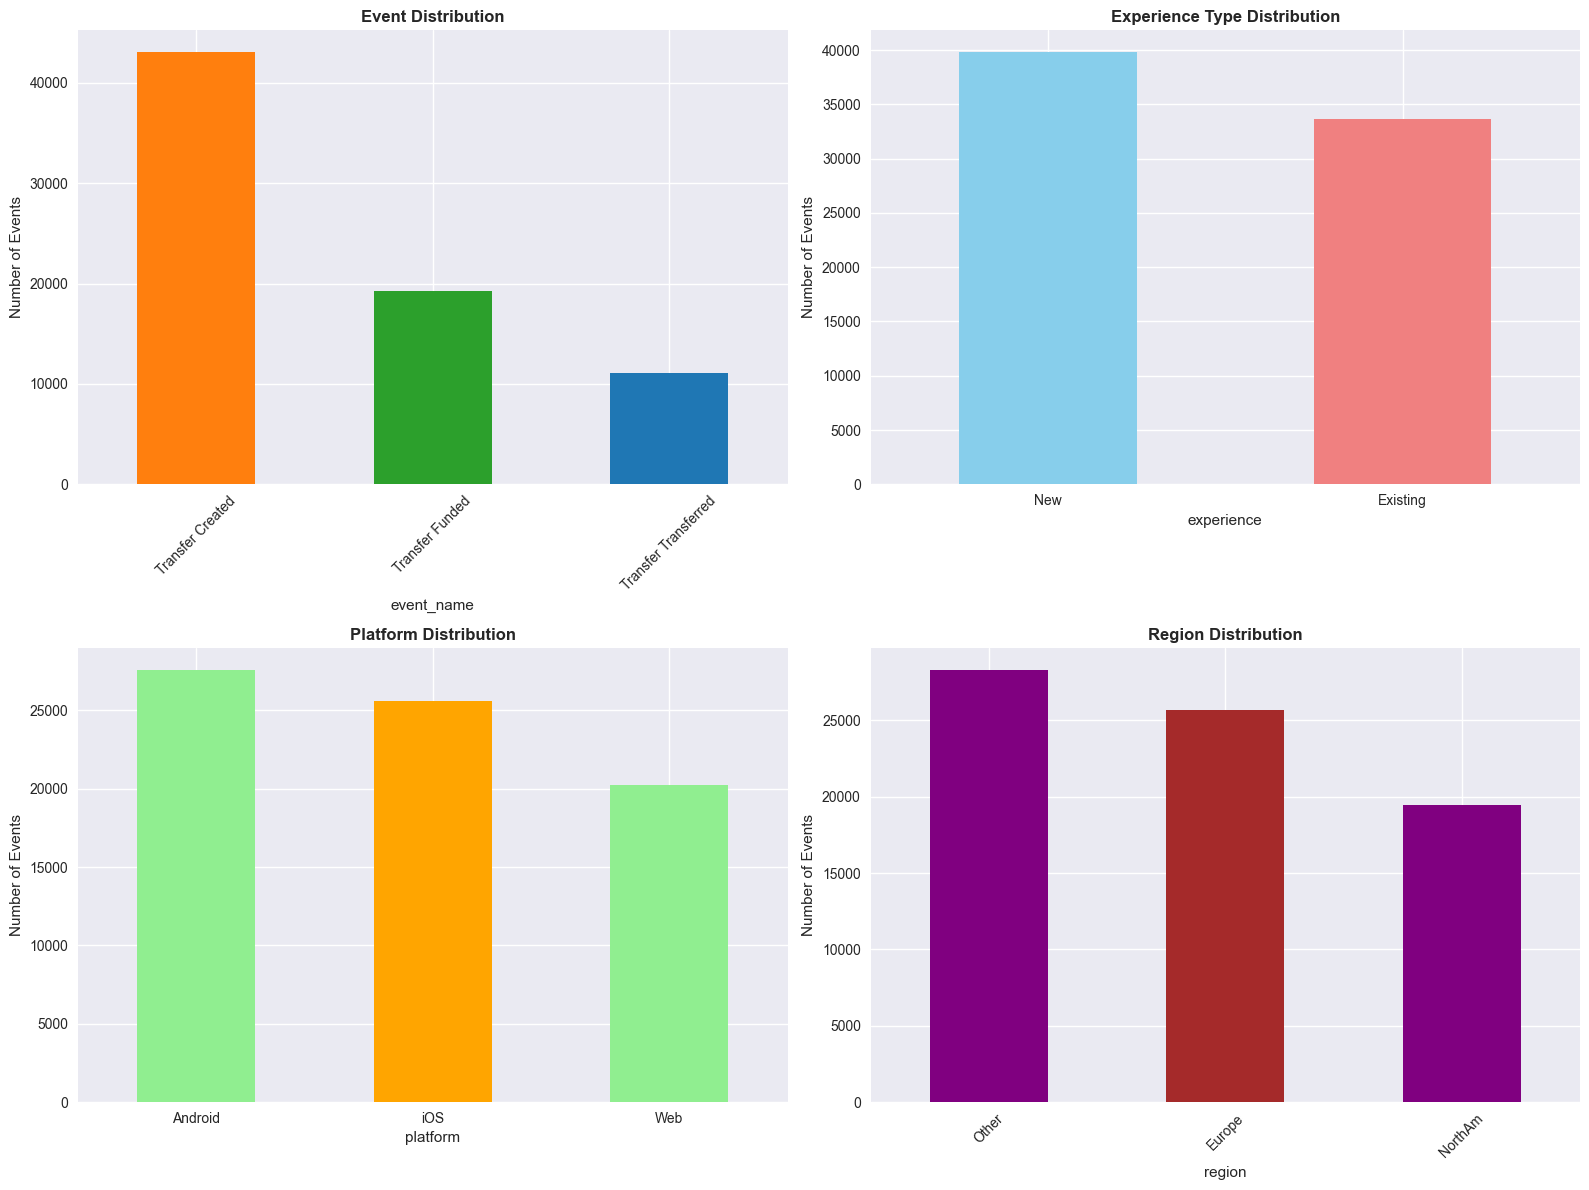

📊 DISTRIBUTION PERCENTAGES:

Experience:
• New: 54.2%
• Existing: 45.8%

Platform:
• Android: 37.6%
• iOS: 34.9%
• Web: 27.6%

Region:
• Other: 38.5%
• Europe: 34.9%
• NorthAm: 26.5%


In [2]:
# Event distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Event counts
event_counts.plot(kind='bar', ax=axes[0,0], color=['#ff7f0e', '#2ca02c', '#1f77b4'])
axes[0,0].set_title('Event Distribution', fontweight='bold')
axes[0,0].set_ylabel('Number of Events')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Experience distribution
exp_counts = df['experience'].value_counts()
exp_counts.plot(kind='bar', ax=axes[0,1], color=['skyblue', 'lightcoral'])
axes[0,1].set_title('Experience Type Distribution', fontweight='bold')
axes[0,1].set_ylabel('Number of Events')
axes[0,1].tick_params(axis='x', rotation=0)

# 3. Platform distribution
platform_counts = df['platform'].value_counts()
platform_counts.plot(kind='bar', ax=axes[1,0], color=['lightgreen', 'orange'])
axes[1,0].set_title('Platform Distribution', fontweight='bold')
axes[1,0].set_ylabel('Number of Events')
axes[1,0].tick_params(axis='x', rotation=0)

# 4. Region distribution
region_counts = df['region'].value_counts()
region_counts.plot(kind='bar', ax=axes[1,1], color=['purple', 'brown'])
axes[1,1].set_title('Region Distribution', fontweight='bold')
axes[1,1].set_ylabel('Number of Events')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print percentages
print("📊 DISTRIBUTION PERCENTAGES:")
print(f"\nExperience:")
for exp, count in exp_counts.items():
    print(f"• {exp}: {count/len(df)*100:.1f}%")

print(f"\nPlatform:")
for platform, count in platform_counts.items():
    print(f"• {platform}: {count/len(df)*100:.1f}%")

print(f"\nRegion:")
for region, count in region_counts.items():
    print(f"• {region}: {count/len(df)*100:.1f}%")

## 2. Funnel Progression Analysis

### Focus: From Transfer Created → Transfer Funded → Transfer Transferred

🎯 FUNNEL PROGRESSION ANALYSIS
👥 FUNNEL PROGRESSION:
• Users who created transfers: 40,223
• Users who funded transfers: 18,195
• Users who completed transfers: 10,557

📈 CONVERSION RATES:
• Created → Funded: 45.2%
• Funded → Transferred: 58.0%
• Created → Transferred (Overall): 26.2%

🚨 DROP-OFF ANALYSIS:
• Users who created but never funded: 22,028 (54.8%)
• Users who funded but never transferred: 7,638 (42.0%)


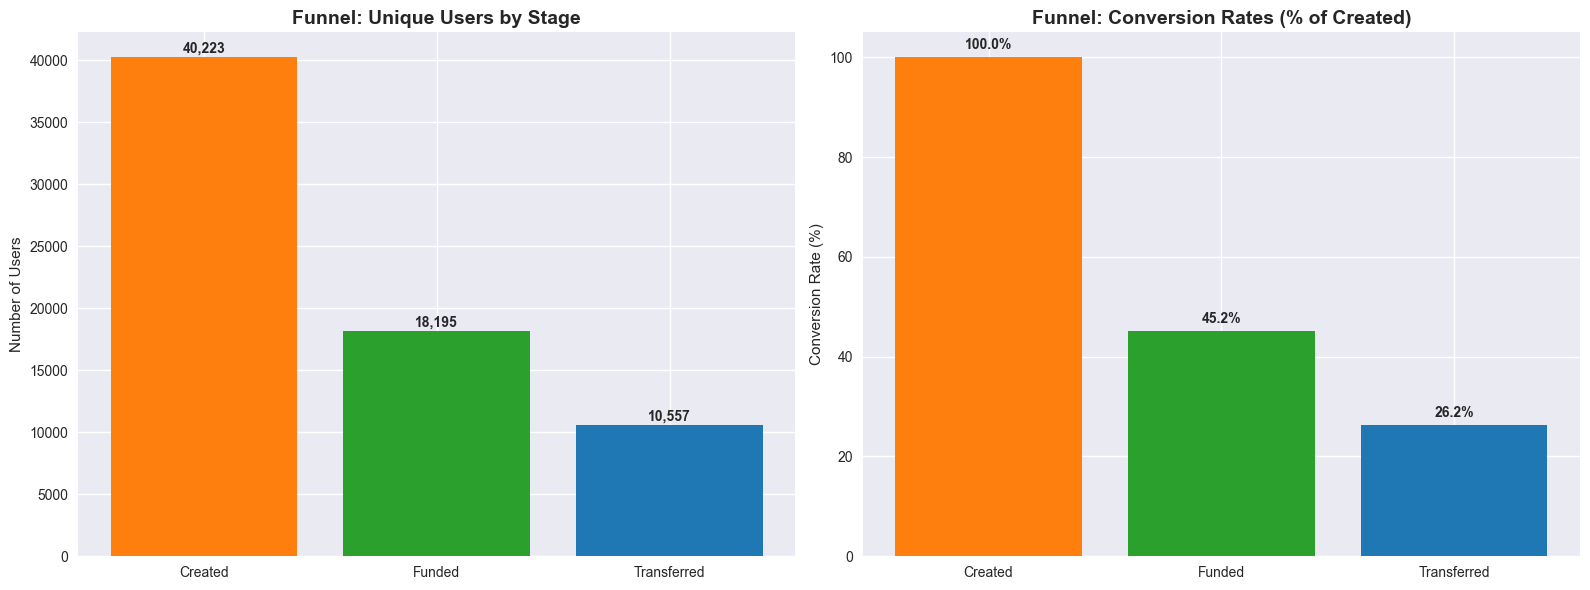

In [3]:
print("🎯 FUNNEL PROGRESSION ANALYSIS")
print("="*50)

# Step 1: Users who created transfers
created_users = set(df[df['event_name'] == 'Transfer Created']['user_id'])
funded_users = set(df[df['event_name'] == 'Transfer Funded']['user_id'])
transferred_users = set(df[df['event_name'] == 'Transfer Transferred']['user_id'])

print(f"👥 FUNNEL PROGRESSION:")
print(f"• Users who created transfers: {len(created_users):,}")
print(f"• Users who funded transfers: {len(funded_users):,}")
print(f"• Users who completed transfers: {len(transferred_users):,}")

# Conversion rates
created_to_funded = len(funded_users) / len(created_users) * 100
funded_to_transferred = len(transferred_users) / len(funded_users) * 100
created_to_transferred = len(transferred_users) / len(created_users) * 100

print(f"\n📈 CONVERSION RATES:")
print(f"• Created → Funded: {created_to_funded:.1f}%")
print(f"• Funded → Transferred: {funded_to_transferred:.1f}%")
print(f"• Created → Transferred (Overall): {created_to_transferred:.1f}%")

# Drop-off analysis
created_not_funded = created_users - funded_users
funded_not_transferred = funded_users - transferred_users

print(f"\n🚨 DROP-OFF ANALYSIS:")
print(f"• Users who created but never funded: {len(created_not_funded):,} ({len(created_not_funded)/len(created_users)*100:.1f}%)")
print(f"• Users who funded but never transferred: {len(funded_not_transferred):,} ({len(funded_not_transferred)/len(funded_users)*100:.1f}%)")

# Visualize funnel
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Absolute numbers
funnel_stages = ['Created', 'Funded', 'Transferred']
funnel_counts = [len(created_users), len(funded_users), len(transferred_users)]
colors = ['#ff7f0e', '#2ca02c', '#1f77b4']

bars1 = ax1.bar(funnel_stages, funnel_counts, color=colors)
ax1.set_title('Funnel: Unique Users by Stage', fontweight='bold', fontsize=14)
ax1.set_ylabel('Number of Users')

# Add value labels
for bar, count in zip(bars1, funnel_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Conversion rates
conversion_rates = [100, created_to_funded, created_to_transferred]
bars2 = ax2.bar(funnel_stages, conversion_rates, color=colors)
ax2.set_title('Funnel: Conversion Rates (% of Created)', fontweight='bold', fontsize=14)
ax2.set_ylabel('Conversion Rate (%)')
ax2.set_ylim(0, 105)

# Add value labels
for bar, rate in zip(bars2, conversion_rates):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Frequent Users Analysis

### Who are the customers doing transfers frequently?

👑 FREQUENT USERS ANALYSIS
📊 TRANSFER FREQUENCY DISTRIBUTION:
• 1 completed transfer(s): 10,044 users (95.1%)
• 2 completed transfer(s): 503 users (4.8%)
• 3 completed transfer(s): 10 users (0.1%)

👑 FREQUENT USERS (2+ completed transfers):
• Total frequent users: 513
• % of users with transfers: 4.9%
• % of all users who created: 1.3%
• Average transfers per frequent user: 2.0
• Max transfers by single user: 3

🏆 TOP 10 MOST FREQUENT USERS:
 1. User 1556990.0: 3 completed transfers
 2. User 1771786.0: 3 completed transfers
 3. User 1351181.0: 3 completed transfers
 4. User 1116906.0: 3 completed transfers
 5. User 1019293.0: 3 completed transfers
 6. User 1205546.0: 3 completed transfers
 7. User 1034794.0: 3 completed transfers
 8. User 1525096.0: 3 completed transfers
 9. User 1490983.0: 3 completed transfers
10. User 1586462.0: 3 completed transfers

🔍 FREQUENT USER CHARACTERISTICS:
Platform distribution:
• iOS: 42.9%
• Android: 31.2%
• Web: 25.9%

Experience distribution:
• Existin

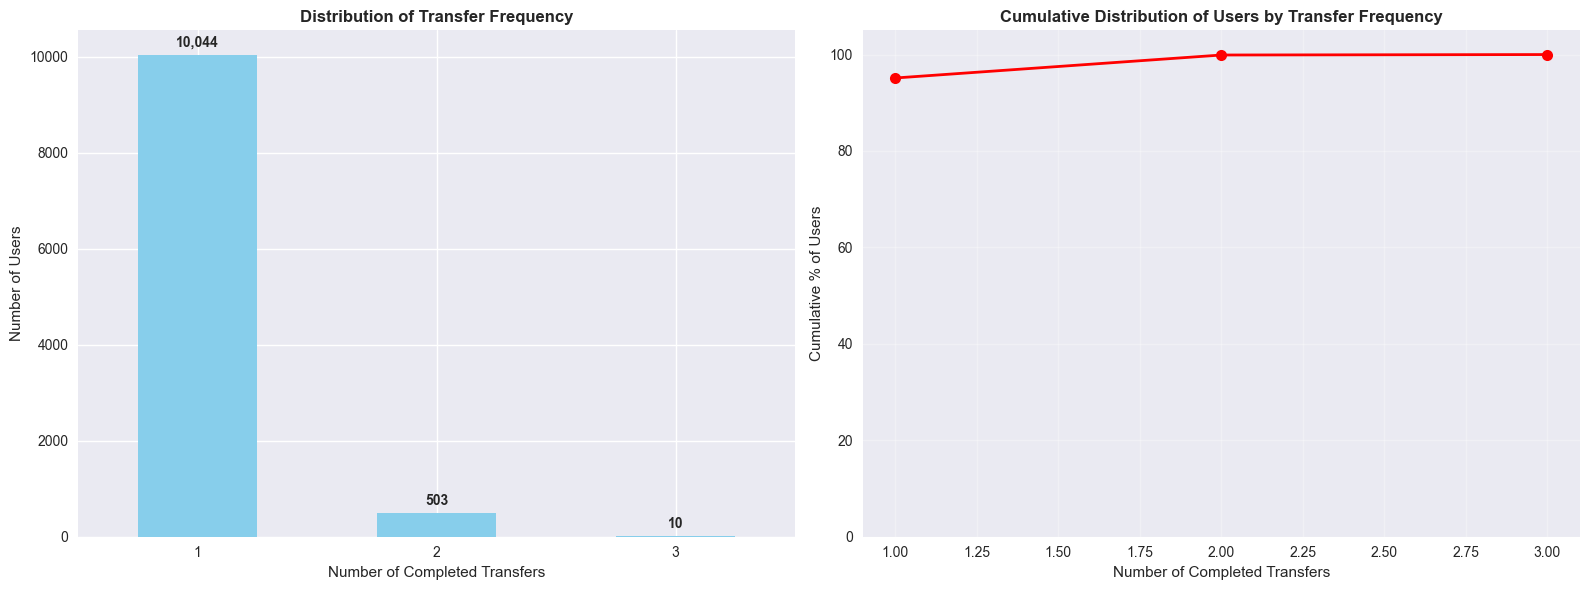

In [4]:
print("👑 FREQUENT USERS ANALYSIS")
print("="*40)

# Count completed transfers per user
user_transfer_counts = df[df['event_name'] == 'Transfer Transferred']['user_id'].value_counts()

# Distribution of transfer frequency
frequency_distribution = user_transfer_counts.value_counts().sort_index()

print(f"📊 TRANSFER FREQUENCY DISTRIBUTION:")
total_users_with_transfers = len(user_transfer_counts)
for transfers, user_count in frequency_distribution.items():
    pct = user_count / total_users_with_transfers * 100
    print(f"• {transfers} completed transfer(s): {user_count:,} users ({pct:.1f}%)")

# Identify frequent users (2+ transfers)
frequent_users = user_transfer_counts[user_transfer_counts >= 2]
print(f"\n👑 FREQUENT USERS (2+ completed transfers):")
print(f"• Total frequent users: {len(frequent_users):,}")
print(f"• % of users with transfers: {len(frequent_users)/total_users_with_transfers*100:.1f}%")
print(f"• % of all users who created: {len(frequent_users)/len(created_users)*100:.1f}%")

if len(frequent_users) > 0:
    print(f"• Average transfers per frequent user: {frequent_users.mean():.1f}")
    print(f"• Max transfers by single user: {frequent_users.max()}")
    
    # Top frequent users
    print(f"\n🏆 TOP 10 MOST FREQUENT USERS:")
    for i, (user_id, count) in enumerate(frequent_users.head(10).items(), 1):
        print(f"{i:2d}. User {user_id}: {count} completed transfers")

# Analyze frequent user characteristics
if len(frequent_users) > 0:
    frequent_user_ids = frequent_users.index.tolist()
    frequent_user_data = df[df['user_id'].isin(frequent_user_ids)]
    
    print(f"\n🔍 FREQUENT USER CHARACTERISTICS:")
    print(f"Platform distribution:")
    freq_platform = frequent_user_data['platform'].value_counts(normalize=True) * 100
    for platform, pct in freq_platform.items():
        print(f"• {platform}: {pct:.1f}%")
    
    print(f"\nExperience distribution:")
    freq_exp = frequent_user_data['experience'].value_counts(normalize=True) * 100
    for exp, pct in freq_exp.items():
        print(f"• {exp}: {pct:.1f}%")
    
    print(f"\nRegion distribution:")
    freq_region = frequent_user_data['region'].value_counts(normalize=True) * 100
    for region, pct in freq_region.items():
        print(f"• {region}: {pct:.1f}%")

# Visualize frequency distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Transfer frequency distribution
frequency_distribution.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribution of Transfer Frequency', fontweight='bold')
ax1.set_xlabel('Number of Completed Transfers')
ax1.set_ylabel('Number of Users')
ax1.tick_params(axis='x', rotation=0)

# Add value labels
for i, (transfers, count) in enumerate(frequency_distribution.items()):
    ax1.text(i, count + max(frequency_distribution) * 0.01, f'{count:,}', 
             ha='center', va='bottom', fontweight='bold')

# Cumulative percentage
cumulative_pct = frequency_distribution.cumsum() / frequency_distribution.sum() * 100
cumulative_pct.plot(kind='line', ax=ax2, marker='o', linewidth=2, markersize=8, color='red')
ax2.set_title('Cumulative Distribution of Users by Transfer Frequency', fontweight='bold')
ax2.set_xlabel('Number of Completed Transfers')
ax2.set_ylabel('Cumulative % of Users')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 105)

plt.tight_layout()
plt.show()

📊 FREQUENCY OF FREQUENCY ANALYSIS

TRANSFER CREATED:
• Total unique users: 40,223
• Frequency distribution:
  - 1 time(s): 37,496 users (93.2%)
  - 2 time(s): 2,633 users (6.5%)
  - 3 time(s): 71 users (0.2%)
  - 4 time(s): 20 users (0.0%)
  - 5 time(s): 3 users (0.0%)

TRANSFER FUNDED:
• Total unique users: 18,195
• Frequency distribution:
  - 1 time(s): 17,130 users (94.1%)
  - 2 time(s): 1,040 users (5.7%)
  - 3 time(s): 20 users (0.1%)
  - 4 time(s): 5 users (0.0%)

TRANSFER TRANSFERRED:
• Total unique users: 10,557
• Frequency distribution:
  - 1 time(s): 10,044 users (95.1%)
  - 2 time(s): 503 users (4.8%)
  - 3 time(s): 10 users (0.1%)


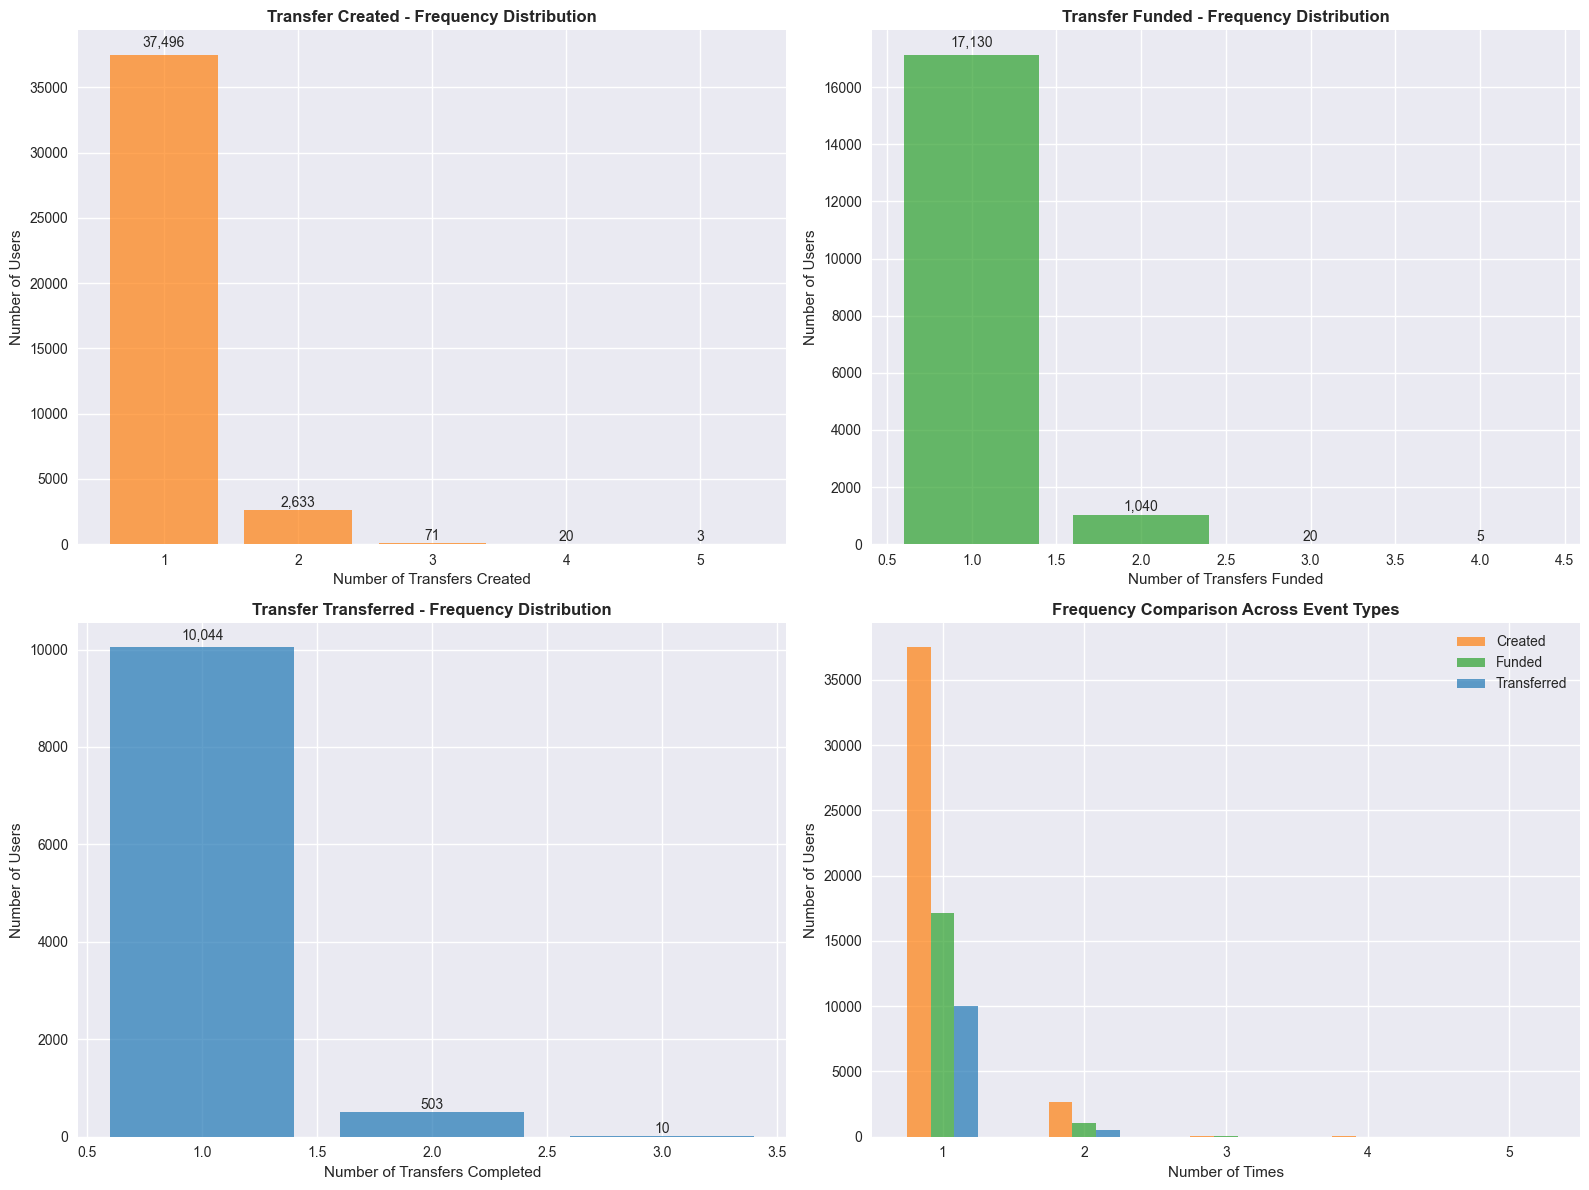


📊 SUMMARY STATISTICS:

Transfer Created:
  • Mean events per user: 1.07
  • Max events by single user: 5
  • Users with 1 event: 37,496 (93.2%)
  • Users with 2+ events: 2,727 (6.8%)
  • Users with 3+ events: 94 (0.2%)

Transfer Funded:
  • Mean events per user: 1.06
  • Max events by single user: 4
  • Users with 1 event: 17,130 (94.1%)
  • Users with 2+ events: 1,065 (5.9%)
  • Users with 3+ events: 25 (0.1%)

Transfer Transferred:
  • Mean events per user: 1.05
  • Max events by single user: 3
  • Users with 1 event: 10,044 (95.1%)
  • Users with 2+ events: 513 (4.9%)
  • Users with 3+ events: 10 (0.1%)

🌊 SANKEY DIAGRAM: USER FREQUENCY FLOW
Top 10 User Journey Patterns:
Created 1, Funded 0, Transferred 0: 21,491 users
Created 1, Funded 1, Transferred 1: 8,836 users
Created 1, Funded 1, Transferred 0: 7,169 users
Created 2, Funded 1, Transferred 1: 745 users
Created 2, Funded 0, Transferred 0: 524 users
Created 2, Funded 2, Transferred 2: 477 users
Created 2, Funded 2, Transferred 


📊 Flow Summary:
• Total flows shown: 15
• Minimum flow size: 10 users
• Largest single flow: 8,836 users
🌊 ADVANCED SANKEY: Experience → Platform → Region → Retries
📊 RETRY CATEGORIES:
• Failed All: 29,666 users (73.8%)
• Perfect Success: 9,317 users (23.2%)
• Low Retries: 1,207 users (3.0%)
• Medium Retries: 27 users (0.1%)
• High Retries: 6 users (0.0%)

🌊 FLOW PATTERNS (min 5 users):
Total significant flow patterns: 56



📊 Advanced Flow Summary:
• Total flow connections: 168
• Minimum flow size: 5 users
• Total users in flows: 40,203
• Most common pattern: Existing → Android → Europe → Failed All (1721 users)

🎯 SUCCESS PATTERNS BY SEGMENT

Success patterns by Experience × Retry Category:
                            User_Count  Avg_Created  Avg_Transferred  \
experience retry_category                                              
Existing   Failed All             9381         1.04             0.00   
           High Retries              3         4.00             1.00   
           Low Retries             708         2.04             1.03   
           Medium Retries           13         3.15             1.08   
           Perfect Success        5112         1.06             1.06   
New        Failed All            20285         1.03             0.00   
           High Retries              3         4.00             1.00   
           Low Retries             499         2.04             1.03   
      

In [5]:
# Install plotly for Sankey diagrams
!pip install plotly --quiet

import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

print("📊 FREQUENCY OF FREQUENCY ANALYSIS")
print("="*50)

# Calculate frequency distributions for each event type
event_types = ['Transfer Created', 'Transfer Funded', 'Transfer Transferred']
frequency_data = {}

for event_type in event_types:
    # Count how many times each user performed this event
    user_event_counts = df[df['event_name'] == event_type]['user_id'].value_counts()
    
    # Count how many users performed this event 1 time, 2 times, etc.
    frequency_distribution = user_event_counts.value_counts().sort_index()
    
    frequency_data[event_type] = {
        'user_counts': user_event_counts,
        'frequency_dist': frequency_distribution
    }
    
    print(f"\n{event_type.upper()}:")
    print(f"• Total unique users: {len(user_event_counts):,}")
    print(f"• Frequency distribution:")
    
    for freq, num_users in frequency_distribution.items():
        pct = num_users / len(user_event_counts) * 100
        print(f"  - {freq} time(s): {num_users:,} users ({pct:.1f}%)")

# Create comprehensive frequency visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Created transfers frequency
created_freq = frequency_data['Transfer Created']['frequency_dist']
bars1 = axes[0,0].bar(created_freq.index, created_freq.values, color='#ff7f0e', alpha=0.7)
axes[0,0].set_title('Transfer Created - Frequency Distribution', fontweight='bold')
axes[0,0].set_xlabel('Number of Transfers Created')
axes[0,0].set_ylabel('Number of Users')

# Add value labels
for bar, count in zip(bars1, created_freq.values):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{count:,}', ha='center', va='bottom', fontsize=10)

# 2. Funded transfers frequency
funded_freq = frequency_data['Transfer Funded']['frequency_dist']
bars2 = axes[0,1].bar(funded_freq.index, funded_freq.values, color='#2ca02c', alpha=0.7)
axes[0,1].set_title('Transfer Funded - Frequency Distribution', fontweight='bold')
axes[0,1].set_xlabel('Number of Transfers Funded')
axes[0,1].set_ylabel('Number of Users')

# Add value labels
for bar, count in zip(bars2, funded_freq.values):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{count:,}', ha='center', va='bottom', fontsize=10)

# 3. Transferred (completed) frequency
transferred_freq = frequency_data['Transfer Transferred']['frequency_dist']
bars3 = axes[1,0].bar(transferred_freq.index, transferred_freq.values, color='#1f77b4', alpha=0.7)
axes[1,0].set_title('Transfer Transferred - Frequency Distribution', fontweight='bold')
axes[1,0].set_xlabel('Number of Transfers Completed')
axes[1,0].set_ylabel('Number of Users')

# Add value labels
for bar, count in zip(bars3, transferred_freq.values):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{count:,}', ha='center', va='bottom', fontsize=10)

# 4. Comparison chart
max_freq = max(created_freq.index.max(), funded_freq.index.max(), transferred_freq.index.max())
freq_comparison = pd.DataFrame({
    'Frequency': range(1, min(max_freq + 1, 6)),  # Show up to 5 for readability
    'Created': [created_freq.get(i, 0) for i in range(1, min(max_freq + 1, 6))],
    'Funded': [funded_freq.get(i, 0) for i in range(1, min(max_freq + 1, 6))],
    'Transferred': [transferred_freq.get(i, 0) for i in range(1, min(max_freq + 1, 6))]
})

freq_comparison.set_index('Frequency').plot(kind='bar', ax=axes[1,1], 
                                           color=['#ff7f0e', '#2ca02c', '#1f77b4'], alpha=0.7)
axes[1,1].set_title('Frequency Comparison Across Event Types', fontweight='bold')
axes[1,1].set_xlabel('Number of Times')
axes[1,1].set_ylabel('Number of Users')
axes[1,1].tick_params(axis='x', rotation=0)
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n📊 SUMMARY STATISTICS:")
for event_type in event_types:
    user_counts = frequency_data[event_type]['user_counts']
    print(f"\n{event_type}:")
    print(f"  • Mean events per user: {user_counts.mean():.2f}")
    print(f"  • Max events by single user: {user_counts.max()}")
    print(f"  • Users with 1 event: {(user_counts == 1).sum():,} ({(user_counts == 1).mean()*100:.1f}%)")
    print(f"  • Users with 2+ events: {(user_counts >= 2).sum():,} ({(user_counts >= 2).mean()*100:.1f}%)")
    if user_counts.max() >= 3:
        print(f"  • Users with 3+ events: {(user_counts >= 3).sum():,} ({(user_counts >= 3).mean()*100:.1f}%)")

print("\n🌊 SANKEY DIAGRAM: USER FREQUENCY FLOW")
print("="*50)

# Create user journey data for Sankey
user_journey_data = []

for user_id in df['user_id'].unique():
    user_events = df[df['user_id'] == user_id]
    
    created_count = len(user_events[user_events['event_name'] == 'Transfer Created'])
    funded_count = len(user_events[user_events['event_name'] == 'Transfer Funded'])
    transferred_count = len(user_events[user_events['event_name'] == 'Transfer Transferred'])
    
    user_journey_data.append({
        'user_id': user_id,
        'created': created_count,
        'funded': funded_count,
        'transferred': transferred_count
    })

user_journey_df = pd.DataFrame(user_journey_data)

# Create frequency flow data
flow_data = []

# Group users by their frequency patterns
patterns = user_journey_df.groupby(['created', 'funded', 'transferred']).size().reset_index(name='count')
patterns = patterns.sort_values('count', ascending=False)

print(f"Top 10 User Journey Patterns:")
for _, row in patterns.head(10).iterrows():
    print(f"Created {row['created']}, Funded {row['funded']}, Transferred {row['transferred']}: {row['count']:,} users")

# Prepare Sankey data for frequency flow
source_nodes = []
target_nodes = []
values = []
labels = []

# Create labels for different frequency levels
for event_type in ['Created', 'Funded', 'Transferred']:
    for freq in range(1, 6):  # 1-5+ frequencies
        if freq == 5:
            labels.append(f"{event_type} 5+")
        else:
            labels.append(f"{event_type} {freq}")

# Create flows between Created → Funded → Transferred
for _, row in patterns.iterrows():
    if row['count'] >= 10:  # Only show significant flows
        created_freq = min(row['created'], 5)
        funded_freq = min(row['funded'], 5)
        transferred_freq = min(row['transferred'], 5)
        
        # Flow from Created to Funded
        if funded_freq > 0:
            source_idx = (created_freq - 1)  # Created frequency index
            target_idx = 5 + (funded_freq - 1)  # Funded frequency index (offset by 5)
            
            source_nodes.append(source_idx)
            target_nodes.append(target_idx)
            values.append(row['count'])
        
        # Flow from Funded to Transferred
        if transferred_freq > 0 and funded_freq > 0:
            source_idx = 5 + (funded_freq - 1)  # Funded frequency index
            target_idx = 10 + (transferred_freq - 1)  # Transferred frequency index (offset by 10)
            
            source_nodes.append(source_idx)
            target_nodes.append(target_idx)
            values.append(row['count'])

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labels,
        color = ["orange"] * 5 + ["green"] * 5 + ["blue"] * 5
    ),
    link = dict(
        source = source_nodes,
        target = target_nodes,
        value = values
    )
)])

fig.update_layout(
    title_text="User Journey Frequency Flow: Created → Funded → Transferred",
    font_size=12,
    width=1200,
    height=600
)

fig.show()

print(f"\n📊 Flow Summary:")
print(f"• Total flows shown: {len(values)}")
print(f"• Minimum flow size: 10 users")
print(f"• Largest single flow: {max(values):,} users")

print("🌊 ADVANCED SANKEY: Experience → Platform → Region → Retries")
print("="*70)

# Create comprehensive user profile for multi-dimensional Sankey
user_profiles_advanced = []

for user_id in df['user_id'].unique():
    user_events = df[df['user_id'] == user_id].sort_values('dt')
    
    # Get user characteristics (use first appearance)
    first_event = user_events.iloc[0]
    
    # Calculate retry patterns (attempts vs completions)
    created_count = len(user_events[user_events['event_name'] == 'Transfer Created'])
    transferred_count = len(user_events[user_events['event_name'] == 'Transfer Transferred'])
    
    # Define retry categories
    if created_count == 0:
        retry_category = "No Attempts"
    elif transferred_count == 0:
        retry_category = "Failed All"
    elif created_count == transferred_count:
        retry_category = "Perfect Success"
    elif created_count > transferred_count:
        retry_ratio = created_count / max(transferred_count, 1)
        if retry_ratio <= 2:
            retry_category = "Low Retries"
        elif retry_ratio <= 3:
            retry_category = "Medium Retries"
        else:
            retry_category = "High Retries"
    else:
        retry_category = "Perfect Success"
    
    user_profiles_advanced.append({
        'user_id': user_id,
        'experience': first_event['experience'],
        'platform': first_event['platform'],
        'region': first_event['region'],
        'retry_category': retry_category,
        'created_count': created_count,
        'transferred_count': transferred_count
    })

advanced_df = pd.DataFrame(user_profiles_advanced)

# Display retry category distribution
print(f"📊 RETRY CATEGORIES:")
retry_dist = advanced_df['retry_category'].value_counts()
for category, count in retry_dist.items():
    pct = count / len(advanced_df) * 100
    print(f"• {category}: {count:,} users ({pct:.1f}%)")

# Create flows for the advanced Sankey
# Flow: Experience → Platform → Region → Retry Category

flow_patterns = advanced_df.groupby(['experience', 'platform', 'region', 'retry_category']).size().reset_index(name='count')
flow_patterns = flow_patterns[flow_patterns['count'] >= 5]  # Filter small flows

print(f"\n🌊 FLOW PATTERNS (min 5 users):")
print(f"Total significant flow patterns: {len(flow_patterns)}")

# Prepare advanced Sankey data
all_labels = []
node_colors = []

# Level 1: Experience
experience_labels = [f"Experience: {exp}" for exp in advanced_df['experience'].unique()]
all_labels.extend(experience_labels)
node_colors.extend(["lightcoral", "lightblue"])  # Colors for New/Existing

# Level 2: Platform  
platform_labels = [f"Platform: {plat}" for plat in advanced_df['platform'].unique()]
all_labels.extend(platform_labels)
node_colors.extend(["lightgreen", "orange"])  # Colors for platforms

# Level 3: Region
region_labels = [f"Region: {reg}" for reg in advanced_df['region'].unique()]
all_labels.extend(region_labels)
node_colors.extend(["purple", "brown"])  # Colors for regions

# Level 4: Retry Categories
retry_labels = [f"Result: {cat}" for cat in advanced_df['retry_category'].unique()]
all_labels.extend(retry_labels)
node_colors.extend(["red", "yellow", "green", "pink", "gray", "cyan"][:len(retry_labels)])

# Create node index mapping
label_to_index = {label: idx for idx, label in enumerate(all_labels)}

# Build flows
source_nodes_adv = []
target_nodes_adv = []
values_adv = []

for _, row in flow_patterns.iterrows():
    count = row['count']
    
    # Flow 1: Experience → Platform
    exp_idx = label_to_index[f"Experience: {row['experience']}"]
    plat_idx = label_to_index[f"Platform: {row['platform']}"]
    source_nodes_adv.append(exp_idx)
    target_nodes_adv.append(plat_idx)
    values_adv.append(count)
    
    # Flow 2: Platform → Region
    reg_idx = label_to_index[f"Region: {row['region']}"]
    source_nodes_adv.append(plat_idx)
    target_nodes_adv.append(reg_idx)
    values_adv.append(count)
    
    # Flow 3: Region → Retry Category
    retry_idx = label_to_index[f"Result: {row['retry_category']}"]
    source_nodes_adv.append(reg_idx)
    target_nodes_adv.append(retry_idx)
    values_adv.append(count)

# Create advanced Sankey diagram
fig_advanced = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = all_labels,
        color = node_colors
    ),
    link = dict(
        source = source_nodes_adv,
        target = target_nodes_adv,
        value = values_adv
    )
)])

fig_advanced.update_layout(
    title_text="Multi-Dimensional User Flow: Experience → Platform → Region → Success/Retry Pattern",
    font_size=10,
    width=1400,
    height=800
)

fig_advanced.show()

print(f"\n📊 Advanced Flow Summary:")
print(f"• Total flow connections: {len(values_adv)}")
print(f"• Minimum flow size: 5 users")
print(f"• Total users in flows: {sum(values_adv)//3:,}")  # Divide by 3 since each user creates 3 flows
print(f"• Most common pattern: {flow_patterns.iloc[0]['experience']} → {flow_patterns.iloc[0]['platform']} → {flow_patterns.iloc[0]['region']} → {flow_patterns.iloc[0]['retry_category']} ({flow_patterns.iloc[0]['count']} users)")

# Additional analysis: Success patterns by segments
print(f"\n🎯 SUCCESS PATTERNS BY SEGMENT")
print("="*40)

# Success rate by experience and retry pattern
success_analysis = advanced_df.groupby(['experience', 'retry_category']).agg({
    'user_id': 'count',
    'created_count': 'mean',
    'transferred_count': 'mean'
}).round(2)

success_analysis.columns = ['User_Count', 'Avg_Created', 'Avg_Transferred']
success_analysis['Success_Rate'] = (success_analysis['Avg_Transferred'] / success_analysis['Avg_Created'] * 100).round(1)

print(f"\nSuccess patterns by Experience × Retry Category:")
print(success_analysis)

# Most efficient segments (high success, low retries)
efficient_segments = flow_patterns[
    (flow_patterns['retry_category'].isin(['Perfect Success', 'Low Retries'])) &
    (flow_patterns['count'] >= 10)
].sort_values('count', ascending=False)

print(f"\n🏆 MOST EFFICIENT SEGMENTS (Perfect Success or Low Retries, min 10 users):")
for _, row in efficient_segments.head(5).iterrows():
    print(f"• {row['experience']} × {row['platform']} × {row['region']}: {row['count']:,} users ({row['retry_category']})")

# Problem segments (high failure or retries)
problem_segments = flow_patterns[
    (flow_patterns['retry_category'].isin(['Failed All', 'High Retries'])) &
    (flow_patterns['count'] >= 5)
].sort_values('count', ascending=False)

print(f"\n🚨 PROBLEM SEGMENTS (Failed All or High Retries, min 5 users):")
for _, row in problem_segments.head(5).iterrows():
    print(f"• {row['experience']} × {row['platform']} × {row['region']}: {row['count']:,} users ({row['retry_category']})")

print(f"\n💡 KEY INSIGHTS FROM SANKEY ANALYSIS:")
print(f"• Most users have '{retry_dist.index[0]}' pattern ({retry_dist.iloc[0]:,} users)")
print(f"• Top performing segment: {efficient_segments.iloc[0]['experience']} users on {efficient_segments.iloc[0]['platform']} in {efficient_segments.iloc[0]['region']}")
print(f"• Biggest problem area: {problem_segments.iloc[0]['retry_category']} pattern with {problem_segments.iloc[0]['count']:,} users")
print(f"• Flow visualization reveals clear patterns for optimization targeting")

## 3.5. Frequency of Frequency Analysis\n\n### How many customers created 1, 2, 3+ transfers? Funded? Transferred?

## 4. New vs Existing Customer Analysis (Primary Split)

### Understanding the performance difference

In [6]:
print("🆕 NEW vs EXISTING CUSTOMER ANALYSIS")
print("="*50)

# First, check if users have mixed labels
user_experience_check = df.groupby('user_id')['experience'].nunique()
mixed_label_users = user_experience_check[user_experience_check > 1]

print(f"🚨 LABEL CONSISTENCY CHECK:")
print(f"• Users with consistent labels: {len(user_experience_check[user_experience_check == 1]):,}")
print(f"• Users with mixed labels: {len(mixed_label_users):,} ({len(mixed_label_users)/len(user_experience_check)*100:.1f}%)")

if len(mixed_label_users) > 0:
    print(f"\n⚠️  WARNING: {len(mixed_label_users)} users have both 'New' and 'Existing' labels")
    print(f"This suggests labels are transaction-specific, not user-specific")

# Analyze by first experience (user's initial classification)
user_first_experience = df.groupby('user_id').first()['experience']

print(f"\n📊 USER CLASSIFICATION (by first appearance):")
first_exp_counts = user_first_experience.value_counts()
for exp, count in first_exp_counts.items():
    pct = count / len(user_first_experience) * 100
    print(f"• {exp} users: {count:,} ({pct:.1f}%)")

# Funnel performance by experience (using first experience)
print(f"\n🎯 FUNNEL PERFORMANCE BY EXPERIENCE:")

for exp in ['New', 'Existing']:
    exp_users = set(user_first_experience[user_first_experience == exp].index)
    
    exp_created = len(exp_users.intersection(created_users))
    exp_funded = len(exp_users.intersection(funded_users))
    exp_transferred = len(exp_users.intersection(transferred_users))
    
    created_to_funded = exp_funded / exp_created * 100 if exp_created > 0 else 0
    created_to_transferred = exp_transferred / exp_created * 100 if exp_created > 0 else 0
    
    print(f"\n{exp.upper()} USERS:")
    print(f"  • Created transfers: {exp_created:,}")
    print(f"  • Funded transfers: {exp_funded:,} ({created_to_funded:.1f}% conversion)")
    print(f"  • Completed transfers: {exp_transferred:,} ({created_to_transferred:.1f}% conversion)")

# Calculate success rates for comparison
new_users = set(user_first_experience[user_first_experience == 'New'].index)
existing_users = set(user_first_experience[user_first_experience == 'Existing'].index)

new_success_rate = len(new_users.intersection(transferred_users)) / len(new_users.intersection(created_users)) * 100
existing_success_rate = len(existing_users.intersection(transferred_users)) / len(existing_users.intersection(created_users)) * 100

print(f"\n📈 SUCCESS RATE COMPARISON:")
print(f"• New users success rate: {new_success_rate:.1f}%")
print(f"• Existing users success rate: {existing_success_rate:.1f}%")
print(f"• Performance gap: {existing_success_rate - new_success_rate:.1f} percentage points")
print(f"• Existing users are {existing_success_rate/new_success_rate:.1f}x more successful" if new_success_rate > 0 else "")

🆕 NEW vs EXISTING CUSTOMER ANALYSIS
🚨 LABEL CONSISTENCY CHECK:
• Users with consistent labels: 39,404
• Users with mixed labels: 819 (2.0%)

⚠️  WARNING: 819 users have both 'New' and 'Existing' labels
This suggests labels are transaction-specific, not user-specific

📊 USER CLASSIFICATION (by first appearance):
• New users: 24,666 (61.3%)
• Existing users: 15,557 (38.7%)

🎯 FUNNEL PERFORMANCE BY EXPERIENCE:

NEW USERS:
  • Created transfers: 24,666
  • Funded transfers: 8,614 (34.9% conversion)
  • Completed transfers: 4,397 (17.8% conversion)

EXISTING USERS:
  • Created transfers: 15,557
  • Funded transfers: 9,581 (61.6% conversion)
  • Completed transfers: 6,160 (39.6% conversion)

📈 SUCCESS RATE COMPARISON:
• New users success rate: 17.8%
• Existing users success rate: 39.6%
• Performance gap: 21.8 percentage points
• Existing users are 2.2x more successful


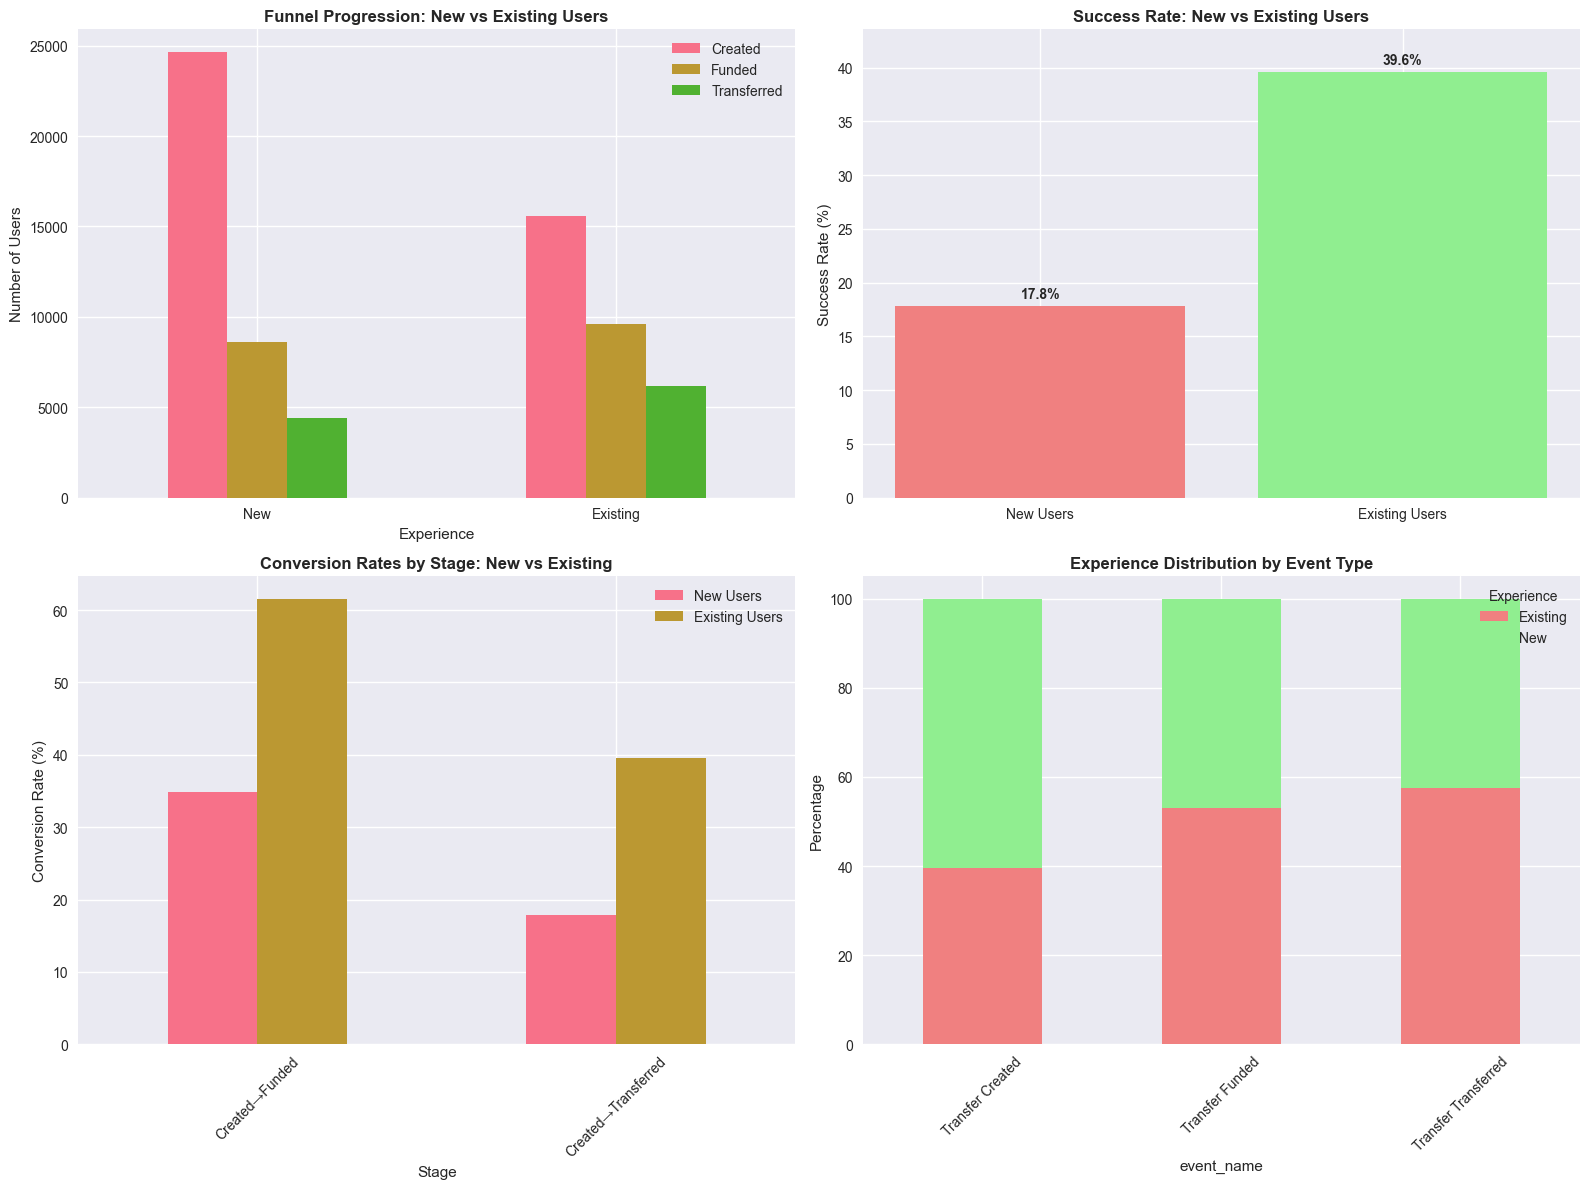


💡 KEY INSIGHT:
Existing users are 2.2x more likely to complete transfers than new users
This confirms that experience/familiarity significantly impacts success rates


In [7]:
# Visualize New vs Existing performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. User counts by experience
exp_data = pd.DataFrame({
    'Experience': ['New', 'Existing'],
    'Created': [len(new_users.intersection(created_users)), len(existing_users.intersection(created_users))],
    'Funded': [len(new_users.intersection(funded_users)), len(existing_users.intersection(funded_users))],
    'Transferred': [len(new_users.intersection(transferred_users)), len(existing_users.intersection(transferred_users))]
})

exp_data.set_index('Experience')[['Created', 'Funded', 'Transferred']].plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Funnel Progression: New vs Existing Users', fontweight='bold')
axes[0,0].set_ylabel('Number of Users')
axes[0,0].tick_params(axis='x', rotation=0)
axes[0,0].legend()

# 2. Success rates comparison
success_rates = [new_success_rate, existing_success_rate]
colors = ['lightcoral', 'lightgreen']
bars = axes[0,1].bar(['New Users', 'Existing Users'], success_rates, color=colors)
axes[0,1].set_title('Success Rate: New vs Existing Users', fontweight='bold')
axes[0,1].set_ylabel('Success Rate (%)')
axes[0,1].set_ylim(0, max(success_rates) * 1.1)

# Add value labels
for bar, rate in zip(bars, success_rates):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Conversion rates by stage
new_created = len(new_users.intersection(created_users))
new_funded = len(new_users.intersection(funded_users))
new_transferred = len(new_users.intersection(transferred_users))

existing_created = len(existing_users.intersection(created_users))
existing_funded = len(existing_users.intersection(funded_users))
existing_transferred = len(existing_users.intersection(transferred_users))

conversion_data = pd.DataFrame({
    'Stage': ['Created→Funded', 'Created→Transferred'],
    'New Users': [
        new_funded/new_created*100 if new_created > 0 else 0,
        new_transferred/new_created*100 if new_created > 0 else 0
    ],
    'Existing Users': [
        existing_funded/existing_created*100 if existing_created > 0 else 0,
        existing_transferred/existing_created*100 if existing_created > 0 else 0
    ]
})

conversion_data.set_index('Stage').plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Conversion Rates by Stage: New vs Existing', fontweight='bold')
axes[1,0].set_ylabel('Conversion Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend()

# 4. Distribution of experience types in events
event_exp_dist = df.groupby(['event_name', 'experience']).size().unstack(fill_value=0)
event_exp_pct = event_exp_dist.div(event_exp_dist.sum(axis=1), axis=0) * 100

event_exp_pct.plot(kind='bar', stacked=True, ax=axes[1,1], color=['lightcoral', 'lightgreen'])
axes[1,1].set_title('Experience Distribution by Event Type', fontweight='bold')
axes[1,1].set_ylabel('Percentage')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title='Experience')

plt.tight_layout()
plt.show()

print(f"\n💡 KEY INSIGHT:")
print(f"Existing users are {existing_success_rate/new_success_rate:.1f}x more likely to complete transfers than new users")
print(f"This confirms that experience/familiarity significantly impacts success rates")

## 5. Secondary Splits: Region and Platform within New/Existing

### Detailed segmentation analysis

In [8]:
print("🌍 REGION & PLATFORM ANALYSIS BY EXPERIENCE")
print("="*60)

# Function to calculate success rates for segments
def calculate_segment_success(user_subset, segment_name):
    if len(user_subset) == 0:
        return None
    
    segment_created = len(user_subset.intersection(created_users))
    segment_transferred = len(user_subset.intersection(transferred_users))
    
    if segment_created == 0:
        return None
    
    success_rate = segment_transferred / segment_created * 100
    
    return {
        'segment': segment_name,
        'users': len(user_subset),
        'created': segment_created,
        'transferred': segment_transferred,
        'success_rate': success_rate
    }

# Analyze by Experience → Region → Platform
segment_results = []

for exp in ['New', 'Existing']:
    exp_users = set(user_first_experience[user_first_experience == exp].index)
    exp_data = df[df['user_id'].isin(exp_users)]
    
    print(f"\n{exp.upper()} USERS BREAKDOWN:")
    print(f"Total {exp.lower()} users: {len(exp_users):,}")
    
    # By Region
    print(f"\n📍 BY REGION:")
    for region in df['region'].unique():
        region_users = set(exp_data[exp_data['region'] == region]['user_id'].unique())
        result = calculate_segment_success(region_users, f"{exp}_{region}")
        
        if result and result['created'] >= 20:  # Minimum sample size
            segment_results.append(result)
            print(f"  • {region}: {result['created']:,} created, {result['transferred']:,} completed ({result['success_rate']:.1f}% success)")
    
    # By Platform
    print(f"\n📱 BY PLATFORM:")
    for platform in df['platform'].unique():
        platform_users = set(exp_data[exp_data['platform'] == platform]['user_id'].unique())
        result = calculate_segment_success(platform_users, f"{exp}_{platform}")
        
        if result and result['created'] >= 20:  # Minimum sample size
            print(f"  • {platform}: {result['created']:,} created, {result['transferred']:,} completed ({result['success_rate']:.1f}% success)")
    
    # By Region × Platform combination
    print(f"\n🔀 BY REGION × PLATFORM:")
    for region in df['region'].unique():
        for platform in df['platform'].unique():
            combo_users = set(exp_data[
                (exp_data['region'] == region) & 
                (exp_data['platform'] == platform)
            ]['user_id'].unique())
            
            result = calculate_segment_success(combo_users, f"{exp}_{region}_{platform}")
            
            if result and result['created'] >= 50:  # Higher threshold for combinations
                segment_results.append(result)
                print(f"  • {region} × {platform}: {result['created']:,} created, {result['transferred']:,} completed ({result['success_rate']:.1f}% success)")

# Create summary dataframe
if segment_results:
    segment_df = pd.DataFrame(segment_results)
    segment_df = segment_df.sort_values('success_rate', ascending=False)
    
    print(f"\n🏆 TOP PERFORMING SEGMENTS (min sample size):")
    for _, row in segment_df.head(5).iterrows():
        print(f"• {row['segment']}: {row['success_rate']:.1f}% success rate ({row['created']:,} users)")
    
    print(f"\n🚨 WORST PERFORMING SEGMENTS:")
    for _, row in segment_df.tail(3).iterrows():
        print(f"• {row['segment']}: {row['success_rate']:.1f}% success rate ({row['created']:,} users)")
    
    # Performance gap
    if len(segment_df) > 1:
        performance_gap = segment_df.iloc[0]['success_rate'] - segment_df.iloc[-1]['success_rate']
        print(f"\n📊 PERFORMANCE GAP: {performance_gap:.1f} percentage points")

🌍 REGION & PLATFORM ANALYSIS BY EXPERIENCE

NEW USERS BREAKDOWN:
Total new users: 24,666

📍 BY REGION:
  • NorthAm: 3,910 created, 840 completed (21.5% success)
  • Europe: 8,521 created, 1,188 completed (13.9% success)
  • Other: 12,515 created, 2,474 completed (19.8% success)

📱 BY PLATFORM:
  • iOS: 7,491 created, 1,740 completed (23.2% success)
  • Web: 7,068 created, 1,245 completed (17.6% success)
  • Android: 10,420 created, 1,527 completed (14.7% success)

🔀 BY REGION × PLATFORM:
  • NorthAm × iOS: 1,548 created, 361 completed (23.3% success)
  • NorthAm × Web: 1,596 created, 305 completed (19.1% success)
  • NorthAm × Android: 774 created, 175 completed (22.6% success)
  • Europe × iOS: 3,450 created, 825 completed (23.9% success)
  • Europe × Web: 1,710 created, 295 completed (17.3% success)
  • Europe × Android: 3,408 created, 86 completed (2.5% success)
  • Other × iOS: 2,521 created, 565 completed (22.4% success)
  • Other × Web: 3,785 created, 654 completed (17.3% success

## 6. Week-over-Week Consistency Analysis

### Are these patterns consistent over time?

In [9]:
print("📅 WEEK-OVER-WEEK CONSISTENCY ANALYSIS")
print("="*50)

# Weekly analysis by experience type
weekly_analysis = []

for week in sorted(df['week'].unique()):
    week_data = df[df['week'] == week]
    
    # Get users who first appeared this week by experience
    week_user_first_exp = week_data.groupby('user_id').first()['experience']
    
    week_new_users = set(week_user_first_exp[week_user_first_exp == 'New'].index)
    week_existing_users = set(week_user_first_exp[week_user_first_exp == 'Existing'].index)
    
    week_created = set(week_data[week_data['event_name'] == 'Transfer Created']['user_id'])
    week_transferred = set(week_data[week_data['event_name'] == 'Transfer Transferred']['user_id'])
    
    # Calculate metrics for each experience type
    new_created = len(week_new_users.intersection(week_created))
    new_transferred = len(week_new_users.intersection(week_transferred))
    new_success = new_transferred / new_created * 100 if new_created > 0 else 0
    
    existing_created = len(week_existing_users.intersection(week_created))
    existing_transferred = len(week_existing_users.intersection(week_transferred))
    existing_success = existing_transferred / existing_created * 100 if existing_created > 0 else 0
    
    weekly_analysis.append({
        'week': week,
        'total_events': len(week_data),
        'new_created': new_created,
        'new_transferred': new_transferred,
        'new_success_rate': new_success,
        'existing_created': existing_created,
        'existing_transferred': existing_transferred,
        'existing_success_rate': existing_success,
        'total_new_users': len(week_new_users),
        'total_existing_users': len(week_existing_users)
    })

weekly_df = pd.DataFrame(weekly_analysis)

# Display weekly summary
print(f"📊 WEEKLY PERFORMANCE SUMMARY:")
print(f"Week | New Success | Existing Success | New Users | Existing Users")
print(f"-" * 70)

for _, row in weekly_df.iterrows():
    print(f"{row['week']:4d} | {row['new_success_rate']:10.1f}% | {row['existing_success_rate']:15.1f}% | {row['total_new_users']:9d} | {row['total_existing_users']:13d}")

# Calculate consistency metrics
new_success_std = weekly_df['new_success_rate'].std()
existing_success_std = weekly_df['existing_success_rate'].std()
new_success_mean = weekly_df['new_success_rate'].mean()
existing_success_mean = weekly_df['existing_success_rate'].mean()

print(f"\n📈 CONSISTENCY METRICS:")
print(f"• New users success rate: {new_success_mean:.1f}% ± {new_success_std:.1f}% (CV: {new_success_std/new_success_mean*100:.1f}%)")
print(f"• Existing users success rate: {existing_success_mean:.1f}% ± {existing_success_std:.1f}% (CV: {existing_success_std/existing_success_mean*100:.1f}%)")

if new_success_std/new_success_mean < 0.2 and existing_success_std/existing_success_mean < 0.2:
    print(f"✅ Patterns are CONSISTENT week-over-week (low coefficient of variation)")
else:
    print(f"⚠️  Patterns show VARIABILITY week-over-week (high coefficient of variation)")

📅 WEEK-OVER-WEEK CONSISTENCY ANALYSIS
📊 WEEKLY PERFORMANCE SUMMARY:
Week | New Success | Existing Success | New Users | Existing Users
----------------------------------------------------------------------


ValueError: Unknown format code 'd' for object of type 'float'

In [ ]:
# Visualize week-over-week trends
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Success rates over time
weekly_df.plot(x='week', y=['new_success_rate', 'existing_success_rate'], 
               ax=axes[0,0], marker='o', linewidth=2)
axes[0,0].set_title('Success Rates by Week: New vs Existing Users', fontweight='bold')
axes[0,0].set_ylabel('Success Rate (%)')
axes[0,0].set_xlabel('Week')
axes[0,0].legend(['New Users', 'Existing Users'])
axes[0,0].grid(True, alpha=0.3)

# 2. User volume over time
weekly_df.plot(x='week', y=['total_new_users', 'total_existing_users'], 
               ax=axes[0,1], marker='s', linewidth=2)
axes[0,1].set_title('User Volume by Week: New vs Existing', fontweight='bold')
axes[0,1].set_ylabel('Number of Users')
axes[0,1].set_xlabel('Week')
axes[0,1].legend(['New Users', 'Existing Users'])
axes[0,1].grid(True, alpha=0.3)

# 3. New vs Existing ratio over time
weekly_df['new_existing_ratio'] = weekly_df['total_new_users'] / weekly_df['total_existing_users']
weekly_df.plot(x='week', y='new_existing_ratio', ax=axes[1,0], 
               marker='o', linewidth=2, color='purple')
axes[1,0].set_title('New/Existing User Ratio by Week', fontweight='bold')
axes[1,0].set_ylabel('New/Existing Ratio')
axes[1,0].set_xlabel('Week')
axes[1,0].grid(True, alpha=0.3)

# 4. Success rate gap over time
weekly_df['success_gap'] = weekly_df['existing_success_rate'] - weekly_df['new_success_rate']
weekly_df.plot(x='week', y='success_gap', ax=axes[1,1], 
               marker='o', linewidth=2, color='orange')
axes[1,1].set_title('Success Rate Gap (Existing - New) by Week', fontweight='bold')
axes[1,1].set_ylabel('Success Rate Gap (percentage points)')
axes[1,1].set_xlabel('Week')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print(f"\n📊 WEEKLY TRENDS INSIGHTS:")
print(f"• Average success gap: {weekly_df['success_gap'].mean():.1f} percentage points")
print(f"• Most consistent week: Week {weekly_df.loc[weekly_df['success_gap'].abs().idxmin(), 'week']} (gap: {weekly_df['success_gap'].min():.1f}pp)")
print(f"• Most variable week: Week {weekly_df.loc[weekly_df['success_gap'].abs().idxmax(), 'week']} (gap: {weekly_df['success_gap'].max():.1f}pp)")

## 7. New Users Deep Dive

### Where are new users coming from? Regional distribution patterns

In [ ]:
print("🆕 NEW USERS DEEP DIVE ANALYSIS")
print("="*40)

# Get all new user events
new_user_events = df[df['experience'] == 'New']
new_user_ids = set(new_user_events['user_id'].unique())

print(f"👥 NEW USERS OVERVIEW:")
print(f"• Total new user events: {len(new_user_events):,}")
print(f"• Unique new users: {len(new_user_ids):,}")
print(f"• Avg events per new user: {len(new_user_events)/len(new_user_ids):.1f}")

# Regional distribution of new users
print(f"\n🌍 NEW USERS BY REGION:")
new_user_regions = new_user_events['region'].value_counts()
total_by_region = df['region'].value_counts()

for region in new_user_regions.index:
    new_count = new_user_regions[region]
    total_count = total_by_region[region]
    new_pct = new_count / new_user_regions.sum() * 100
    representation = new_count / total_count * 100
    
    print(f"• {region}:")
    print(f"  - New user events: {new_count:,} ({new_pct:.1f}% of all new user events)")
    print(f"  - Representation: {representation:.1f}% of {region} events are from new users")

# Platform distribution of new users
print(f"\n📱 NEW USERS BY PLATFORM:")
new_user_platforms = new_user_events['platform'].value_counts()
total_by_platform = df['platform'].value_counts()

for platform in new_user_platforms.index:
    new_count = new_user_platforms[platform]
    total_count = total_by_platform[platform]
    new_pct = new_count / new_user_platforms.sum() * 100
    representation = new_count / total_count * 100
    
    print(f"• {platform}:")
    print(f"  - New user events: {new_count:,} ({new_pct:.1f}% of all new user events)")
    print(f"  - Representation: {representation:.1f}% of {platform} events are from new users")

# Cross-analysis: Region × Platform for new users
print(f"\n🔀 NEW USERS: REGION × PLATFORM BREAKDOWN:")
new_user_cross = new_user_events.groupby(['region', 'platform']).size().reset_index(name='count')
new_user_cross['percentage'] = new_user_cross['count'] / len(new_user_events) * 100

for _, row in new_user_cross.sort_values('count', ascending=False).iterrows():
    print(f"• {row['region']} × {row['platform']}: {row['count']:,} events ({row['percentage']:.1f}%)")

# Compare new user representation across regions
print(f"\n📊 NEW USER REPRESENTATION COMPARISON:")
region_representation = []
for region in df['region'].unique():
    region_total = len(df[df['region'] == region])
    region_new = len(new_user_events[new_user_events['region'] == region])
    representation_pct = region_new / region_total * 100
    
    region_representation.append({
        'region': region,
        'total_events': region_total,
        'new_events': region_new,
        'new_representation': representation_pct
    })

repr_df = pd.DataFrame(region_representation).sort_values('new_representation', ascending=False)

print(f"Regional ranking by new user representation:")
for _, row in repr_df.iterrows():
    print(f"• {row['region']}: {row['new_representation']:.1f}% new user events")

# Statistical test for representation differences
max_repr = repr_df['new_representation'].max()
min_repr = repr_df['new_representation'].min()
repr_gap = max_repr - min_repr

print(f"\n🎯 KEY FINDINGS:")
print(f"• New user representation gap: {repr_gap:.1f} percentage points between regions")
print(f"• Highest new user region: {repr_df.iloc[0]['region']} ({max_repr:.1f}%)")
print(f"• Lowest new user region: {repr_df.iloc[-1]['region']} ({min_repr:.1f}%)")

if repr_gap > 10:
    print(f"⚠️  SIGNIFICANT regional differences in new user representation")
else:
    print(f"✅ Regional new user representation is relatively consistent")

In [ ]:
# Visualize new user patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. New user distribution by region
new_user_regions.plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('New User Events by Region', fontweight='bold')
axes[0,0].set_ylabel('Number of Events')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. New user representation by region
repr_df.plot(x='region', y='new_representation', kind='bar', ax=axes[0,1], color='orange')
axes[0,1].set_title('New User Representation by Region', fontweight='bold')
axes[0,1].set_ylabel('% of Regional Events from New Users')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend().set_visible(False)

# 3. Platform distribution for new users
new_user_platforms.plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('New User Events by Platform', fontweight='bold')
axes[1,0].set_ylabel('Number of Events')
axes[1,0].tick_params(axis='x', rotation=0)

# 4. Heatmap of Region × Platform for new users
pivot_new = new_user_events.pivot_table(values='user_id', index='region', columns='platform', aggfunc='count', fill_value=0)
sns.heatmap(pivot_new, annot=True, fmt='d', cmap='Blues', ax=axes[1,1])
axes[1,1].set_title('New User Events: Region × Platform Heatmap', fontweight='bold')

plt.tight_layout()
plt.show()

# Weekly trend of new users
print(f"\n📅 NEW USER TRENDS BY WEEK:")
weekly_new = new_user_events['week'].value_counts().sort_index()
print(f"Week | New User Events")
print(f"-" * 25)
for week, count in weekly_new.items():
    print(f"{week:4d} | {count:13,}")

new_user_std = weekly_new.std()
new_user_mean = weekly_new.mean()
print(f"\nWeekly new user events: {new_user_mean:.0f} ± {new_user_std:.0f} (CV: {new_user_std/new_user_mean*100:.1f}%)")

if new_user_std/new_user_mean < 0.3:
    print(f"✅ New user acquisition is STABLE week-over-week")
else:
    print(f"⚠️  New user acquisition shows VARIABILITY week-over-week")

## 8. Summary and Key Insights

In [ ]:
print("📋 EXECUTIVE SUMMARY - KEY INSIGHTS")
print("="*60)

print(f"\n🎯 FUNNEL PERFORMANCE:")
print(f"• Users creating transfers: {len(created_users):,}")
print(f"• Funnel conversion (Created→Transferred): {created_to_transferred:.1f}%")
print(f"• Major drop-off at Created→Funded: {len(created_not_funded):,} users ({len(created_not_funded)/len(created_users)*100:.1f}%)")

print(f"\n👑 FREQUENT USERS:")
if len(frequent_users) > 0:
    print(f"• Power users (2+ transfers): {len(frequent_users):,} ({len(frequent_users)/len(created_users)*100:.1f}% of creators)")
    print(f"• Max transfers by single user: {frequent_users.max()}")
    print(f"• Average transfers per power user: {frequent_users.mean():.1f}")

print(f"\n🆕 NEW vs EXISTING PERFORMANCE:")
print(f"• New users success rate: {new_success_rate:.1f}%")
print(f"• Existing users success rate: {existing_success_rate:.1f}%")
print(f"• Performance gap: {existing_success_rate - new_success_rate:.1f} percentage points")
print(f"• Existing users are {existing_success_rate/new_success_rate:.1f}x more successful")

print(f"\n📅 CONSISTENCY:")
print(f"• Success rate patterns are {'CONSISTENT' if new_success_std/new_success_mean < 0.2 else 'VARIABLE'} week-over-week")
print(f"• New user acquisition is {'STABLE' if new_user_std/new_user_mean < 0.3 else 'VARIABLE'} week-over-week")

print(f"\n🌍 REGIONAL INSIGHTS:")
print(f"• New user representation gap: {repr_gap:.1f} percentage points between regions")
print(f"• Highest new user region: {repr_df.iloc[0]['region']} ({repr_df.iloc[0]['new_representation']:.1f}% new)")
print(f"• Lowest new user region: {repr_df.iloc[-1]['region']} ({repr_df.iloc[-1]['new_representation']:.1f}% new)")

if 'segment_df' in locals() and len(segment_df) > 1:
    print(f"\n🔍 SEGMENTATION:")
    print(f"• Best performing segment: {segment_df.iloc[0]['segment']} ({segment_df.iloc[0]['success_rate']:.1f}% success)")
    print(f"• Worst performing segment: {segment_df.iloc[-1]['segment']} ({segment_df.iloc[-1]['success_rate']:.1f}% success)")
    print(f"• Segment performance gap: {performance_gap:.1f} percentage points")

print(f"\n🎯 STRATEGIC PRIORITIES:")
print(f"1. Address the {existing_success_rate - new_success_rate:.1f}pp performance gap between new and existing users")
print(f"2. Focus on the {len(created_not_funded)/len(created_users)*100:.1f}% of users who create but never fund transfers")
print(f"3. Grow the power user base from {len(frequent_users)/len(created_users)*100:.1f}% to higher retention")
print(f"4. Investigate regional differences in new user representation")
if 'segment_df' in locals() and len(segment_df) > 1:
    print(f"5. Optimize worst-performing segments with {performance_gap:.1f}pp gap")

print(f"\n" + "="*60)
print(f"✅ ANALYSIS COMPLETE")
print(f"Ready for strategic planning and optimization initiatives")
print(f"="*60)